In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
for i in range(8):
    if i==0:
        train = pd.read_pickle('salida/nuevo4e/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4e/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            pass

In [3]:
train=train.reset_index(drop=True)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.000000,0.987,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,27,0.333333,0,,0,,0.500000,YES
1,0.000000,0.000000,1.687,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,27,1.000000,0,,0,,0.333333,NO
2,1.878734,1.455456,1.962,2.178,3.867700,0.006142,0.465936,1,0.041667,0,5,1,24,0.800000,0,,0,,0.250000,UNKNOWN
3,0.000000,0.000000,2.097,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,38,1.000000,0,,0,,0.333333,YES
4,1.344579,1.449291,1.949,2.192,3.937175,0.005018,0.381601,0,0.076923,0,5,1,13,0.600000,0,,0,,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.624779,1.420225,1.900,1.805,3.849615,0.003770,0.329502,0,0.062500,0,5,1,16,0.200000,0,,0,,0.500000,UNKNOWN
796,0.000000,0.000000,1.995,0.000,0.000000,0.000000,0.000000,0,0.000000,0,9,0,23,1.000000,0,,0,,0.666667,YES
797,0.000000,0.000000,1.491,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,19,0.666667,0,,0,,0.500000,UNKNOWN
798,0.000000,0.000000,1.667,0.000,0.000000,0.000000,0.000000,0,0.000000,0,5,0,22,0.400000,0,,0,,1.000000,NO


<Axes: title={'center': 'Jaro-Winkler_rit'}, xlabel='clases'>

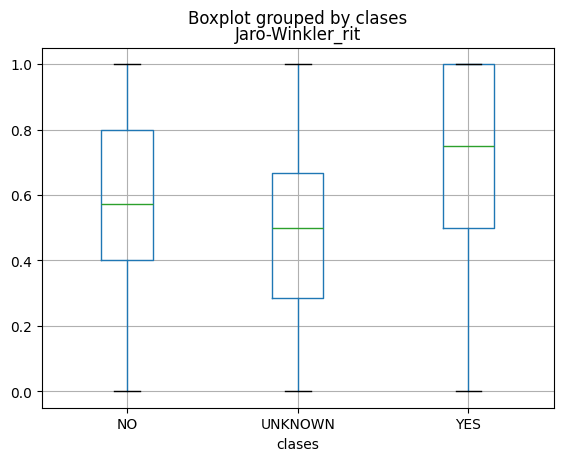

In [4]:
train.boxplot(by="clases",column="Jaro-Winkler_rit")

## Eliminar características

In [5]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
#train=train.drop(["diferencias","list_m","list_M","list_T"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.000000,0.987,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,27,0.333333,0,,0,,0.500000,YES
1,0.000000,0.000000,1.687,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,27,1.000000,0,,0,,0.333333,NO
2,1.878734,1.455456,1.962,2.178,3.867700,0.006142,0.465936,1,0.041667,0,5,1,24,0.800000,0,,0,,0.250000,UNKNOWN
3,0.000000,0.000000,2.097,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,38,1.000000,0,,0,,0.333333,YES
4,1.344579,1.449291,1.949,2.192,3.937175,0.005018,0.381601,0,0.076923,0,5,1,13,0.600000,0,,0,,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.624779,1.420225,1.900,1.805,3.849615,0.003770,0.329502,0,0.062500,0,5,1,16,0.200000,0,,0,,0.500000,UNKNOWN
796,0.000000,0.000000,1.995,0.000,0.000000,0.000000,0.000000,0,0.000000,0,9,0,23,1.000000,0,,0,,0.666667,YES
797,0.000000,0.000000,1.491,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,19,0.666667,0,,0,,0.500000,UNKNOWN
798,0.000000,0.000000,1.667,0.000,0.000000,0.000000,0.000000,0,0.000000,0,5,0,22,0.400000,0,,0,,1.000000,NO


In [6]:
train.columns

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'verbT',
       'negH', 'verbH', 'overlap_ent', 'clases'],
      dtype='object')

In [7]:
train=train.drop(["verbT","verbH"],axis=1)

In [401]:
#train = train[['distancias', 'mutinf', 'max_info',  'diferencias','Jaro-Winkler_rit','overlap_ent','clases']]

In [8]:
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.000000,0.000000,0.987,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,27,0.333333,0,0,0.500000,YES
1,0.000000,0.000000,1.687,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,27,1.000000,0,0,0.333333,NO
2,1.878734,1.455456,1.962,2.178,3.867700,0.006142,0.465936,1,0.041667,0,5,1,24,0.800000,0,0,0.250000,UNKNOWN
3,0.000000,0.000000,2.097,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,38,1.000000,0,0,0.333333,YES
4,1.344579,1.449291,1.949,2.192,3.937175,0.005018,0.381601,0,0.076923,0,5,1,13,0.600000,0,0,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.624779,1.420225,1.900,1.805,3.849615,0.003770,0.329502,0,0.062500,0,5,1,16,0.200000,0,0,0.500000,UNKNOWN
796,0.000000,0.000000,1.995,0.000,0.000000,0.000000,0.000000,0,0.000000,0,9,0,23,1.000000,0,0,0.666667,YES
797,0.000000,0.000000,1.491,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,19,0.666667,0,0,0.500000,UNKNOWN
798,0.000000,0.000000,1.667,0.000,0.000000,0.000000,0.000000,0,0.000000,0,5,0,22,0.400000,0,0,1.000000,NO


In [9]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [10]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [11]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent
sumas,1.000000,0.373550,0.172075,0.806848,0.729608,0.326319,0.838089,-0.031818,0.207555,0.144724,0.054842,0.361704,0.262715,-0.224979,0.040324,0.023043,-0.193674
distancias,0.373550,1.000000,-0.030783,0.600520,0.581545,0.378478,0.425869,0.159967,0.870859,0.218651,0.417722,0.998441,-0.047185,-0.432303,-0.027758,-0.000899,-0.379688
entropia_total,0.172075,-0.030783,1.000000,0.140019,0.058279,0.031405,0.124779,-0.001272,-0.011279,-0.019729,0.124274,-0.044394,-0.033983,0.042591,0.073999,0.004923,0.076146
entropias,0.806848,0.600520,0.140019,1.000000,0.952962,0.511434,0.862600,0.038612,0.520158,0.159571,0.090819,0.587452,-0.057901,-0.366590,-0.014142,0.031527,-0.314179
mutinf,0.729608,0.581545,0.058279,0.952962,1.000000,0.526773,0.807010,0.045705,0.493867,0.121861,0.083351,0.566262,-0.046089,-0.348510,-0.023814,0.031642,-0.307879
mearts,0.326319,0.378478,0.031405,0.511434,0.526773,1.000000,0.370058,0.037539,0.362232,0.098631,0.076353,0.384773,-0.071260,-0.228464,-0.044635,-0.000932,-0.249664
max_info,0.838089,0.425869,0.124779,0.862600,0.807010,0.370058,1.000000,-0.013741,0.344443,0.178482,0.027709,0.414119,0.007701,-0.274483,0.014258,0.045009,-0.205354
list_comp,-0.031818,0.159967,-0.001272,0.038612,0.045705,0.037539,-0.013741,1.000000,0.172932,-0.076787,0.176664,0.160405,-0.084299,-0.091985,0.022754,-0.017149,-0.290452
diferencias,0.207555,0.870859,-0.011279,0.520158,0.493867,0.362232,0.344443,0.172932,1.000000,0.208707,0.357644,0.873194,-0.315910,-0.398560,-0.059254,-0.003782,-0.334329
list_incomp,0.144724,0.218651,-0.019729,0.159571,0.121861,0.098631,0.178482,-0.076787,0.208707,1.000000,0.065502,0.219508,-0.021058,-0.050931,-0.001632,0.076916,0.026277


<Axes: >

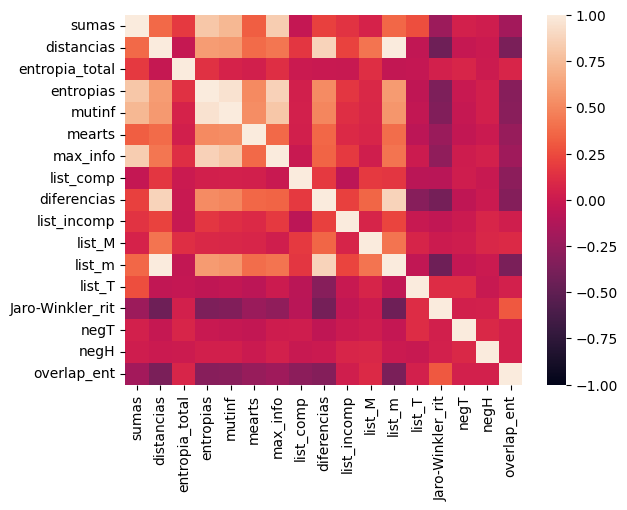

In [12]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [13]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent
sumas,1.000000,0.373550,0.172075,0.806848,0.729608,0.326319,0.838089,-0.031818,0.207555,0.144724,0.054842,0.361704,0.262715,-0.224979,0.040324,0.023043,-0.193674
distancias,0.373550,1.000000,-0.030783,0.600520,0.581545,0.378478,0.425869,0.159967,0.870859,0.218651,0.417722,0.998441,-0.047185,-0.432303,-0.027758,-0.000899,-0.379688
entropia_total,0.172075,-0.030783,1.000000,0.140019,0.058279,0.031405,0.124779,-0.001272,-0.011279,-0.019729,0.124274,-0.044394,-0.033983,0.042591,0.073999,0.004923,0.076146
entropias,0.806848,0.600520,0.140019,1.000000,0.952962,0.511434,0.862600,0.038612,0.520158,0.159571,0.090819,0.587452,-0.057901,-0.366590,-0.014142,0.031527,-0.314179
mutinf,0.729608,0.581545,0.058279,0.952962,1.000000,0.526773,0.807010,0.045705,0.493867,0.121861,0.083351,0.566262,-0.046089,-0.348510,-0.023814,0.031642,-0.307879
mearts,0.326319,0.378478,0.031405,0.511434,0.526773,1.000000,0.370058,0.037539,0.362232,0.098631,0.076353,0.384773,-0.071260,-0.228464,-0.044635,-0.000932,-0.249664
max_info,0.838089,0.425869,0.124779,0.862600,0.807010,0.370058,1.000000,-0.013741,0.344443,0.178482,0.027709,0.414119,0.007701,-0.274483,0.014258,0.045009,-0.205354
list_comp,-0.031818,0.159967,-0.001272,0.038612,0.045705,0.037539,-0.013741,1.000000,0.172932,-0.076787,0.176664,0.160405,-0.084299,-0.091985,0.022754,-0.017149,-0.290452
diferencias,0.207555,0.870859,-0.011279,0.520158,0.493867,0.362232,0.344443,0.172932,1.000000,0.208707,0.357644,0.873194,-0.315910,-0.398560,-0.059254,-0.003782,-0.334329
list_incomp,0.144724,0.218651,-0.019729,0.159571,0.121861,0.098631,0.178482,-0.076787,0.208707,1.000000,0.065502,0.219508,-0.021058,-0.050931,-0.001632,0.076916,0.026277


In [14]:
# Checar variables colineales
#sns.relplot(data=train_m, x="sumas", y="Jaro-Winkler_rit")

In [15]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    else:
        y_train.append(0)

In [16]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

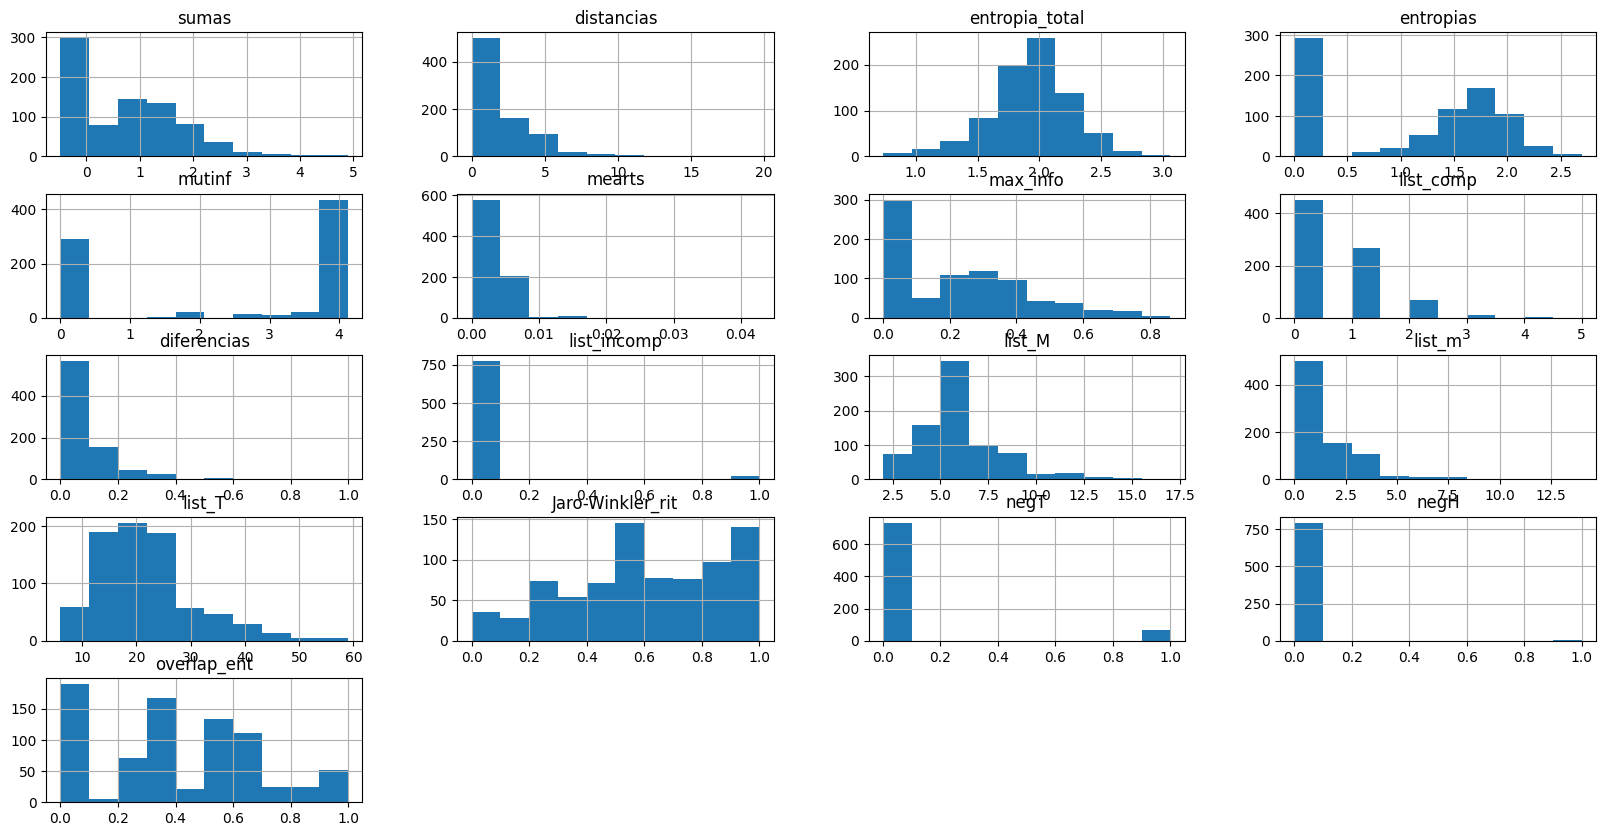

In [17]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [23]:
for i in range(8):
    if i==0:
        test = pd.read_pickle('salida/nuevo4e/GHS/GHS_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4e/GHS/GHS_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            pass

In [24]:
test = test.reset_index(drop=True)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.000000,1.950,0.000,0.000000,0.000000,0.000000,2,0.000000,0,5,0,17,0.800000,0,,0,,0.666667,ENTAILMENT
1,0.438461,22.222702,1.648,1.702,3.408460,0.009896,0.180890,4,1.777778,0,21,16,9,0.047619,0,,0,,0.000000,NONENTAILMENT
2,0.842588,14.627888,1.719,1.767,3.968106,0.004401,0.313517,1,0.588235,0,13,10,17,0.307692,0,,0,,0.000000,NONENTAILMENT
3,0.000000,0.000000,1.995,0.000,0.000000,0.000000,0.000000,2,0.000000,0,6,0,12,0.833333,0,,0,,0.000000,ENTAILMENT
4,0.520280,24.582914,1.788,1.753,3.849227,0.004548,0.233145,5,1.700000,0,23,17,10,0.130435,0,,0,,0.000000,NONENTAILMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.561679,24.970238,1.569,1.456,3.314428,0.003592,0.155089,0,0.947368,0,21,18,19,0.142857,0,,0,,0.166667,NONENTAILMENT
796,0.686623,2.922877,1.808,1.565,3.935828,0.004631,0.204012,1,0.074074,0,7,2,27,0.571429,0,,0,,0.250000,ENTAILMENT
797,0.539739,20.957439,1.709,1.577,3.336211,0.009568,0.190885,2,0.937500,0,18,15,16,0.111111,0,,0,,0.000000,NONENTAILMENT
798,0.905576,21.693279,1.979,1.921,3.582727,0.006588,0.327758,3,0.833333,0,20,15,18,0.150000,0,,1,do,0.090909,NONENTAILMENT


In [25]:
#test=test.drop(["diferencias","list_m","list_M","list_T"],axis=1)


In [26]:
test=test.drop(["verbT","verbH"],axis=1)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.000000,0.000000,1.950,0.000,0.000000,0.000000,0.000000,2,0.000000,0,5,0,17,0.800000,0,0,0.666667,ENTAILMENT
1,0.438461,22.222702,1.648,1.702,3.408460,0.009896,0.180890,4,1.777778,0,21,16,9,0.047619,0,0,0.000000,NONENTAILMENT
2,0.842588,14.627888,1.719,1.767,3.968106,0.004401,0.313517,1,0.588235,0,13,10,17,0.307692,0,0,0.000000,NONENTAILMENT
3,0.000000,0.000000,1.995,0.000,0.000000,0.000000,0.000000,2,0.000000,0,6,0,12,0.833333,0,0,0.000000,ENTAILMENT
4,0.520280,24.582914,1.788,1.753,3.849227,0.004548,0.233145,5,1.700000,0,23,17,10,0.130435,0,0,0.000000,NONENTAILMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.561679,24.970238,1.569,1.456,3.314428,0.003592,0.155089,0,0.947368,0,21,18,19,0.142857,0,0,0.166667,NONENTAILMENT
796,0.686623,2.922877,1.808,1.565,3.935828,0.004631,0.204012,1,0.074074,0,7,2,27,0.571429,0,0,0.250000,ENTAILMENT
797,0.539739,20.957439,1.709,1.577,3.336211,0.009568,0.190885,2,0.937500,0,18,15,16,0.111111,0,0,0.000000,NONENTAILMENT
798,0.905576,21.693279,1.979,1.921,3.582727,0.006588,0.327758,3,0.833333,0,20,15,18,0.150000,0,1,0.090909,NONENTAILMENT


In [27]:
#test = test[['distancias', 'mutinf', 'max_info',  'diferencias','Jaro-Winkler_rit','overlap_ent','clases']]

In [28]:
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.000000,0.000000,1.950,0.000,0.000000,0.000000,0.000000,2,0.000000,0,5,0,17,0.800000,0,0,0.666667,ENTAILMENT
1,0.438461,22.222702,1.648,1.702,3.408460,0.009896,0.180890,4,1.777778,0,21,16,9,0.047619,0,0,0.000000,NONENTAILMENT
2,0.842588,14.627888,1.719,1.767,3.968106,0.004401,0.313517,1,0.588235,0,13,10,17,0.307692,0,0,0.000000,NONENTAILMENT
3,0.000000,0.000000,1.995,0.000,0.000000,0.000000,0.000000,2,0.000000,0,6,0,12,0.833333,0,0,0.000000,ENTAILMENT
4,0.520280,24.582914,1.788,1.753,3.849227,0.004548,0.233145,5,1.700000,0,23,17,10,0.130435,0,0,0.000000,NONENTAILMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.561679,24.970238,1.569,1.456,3.314428,0.003592,0.155089,0,0.947368,0,21,18,19,0.142857,0,0,0.166667,NONENTAILMENT
796,0.686623,2.922877,1.808,1.565,3.935828,0.004631,0.204012,1,0.074074,0,7,2,27,0.571429,0,0,0.250000,ENTAILMENT
797,0.539739,20.957439,1.709,1.577,3.336211,0.009568,0.190885,2,0.937500,0,18,15,16,0.111111,0,0,0.000000,NONENTAILMENT
798,0.905576,21.693279,1.979,1.921,3.582727,0.006588,0.327758,3,0.833333,0,20,15,18,0.150000,0,1,0.090909,NONENTAILMENT


In [29]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [30]:
# RTE3
y_test=[]
for i in y_t:
    if i == "ENTAILMENT":
        y_test.append(1)
    else:
        y_test.append(0)

In [31]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [421]:
# X_train = np.where(np.isnan(X_train), 0, X_train)
# X_train

In [32]:
X_train.shape

(800, 17)

In [33]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [34]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [35]:
model.decision_function(X_train)

array([ 4.12416705e-01,  1.15507615e+00,  3.43836253e-01,  1.18943395e+00,
        2.70194906e-01,  1.18814719e+00,  5.95280992e-01, -7.78690722e-01,
        8.49509555e-01, -8.99414389e-01,  5.53645638e-03,  4.56615976e-01,
        1.43819442e+00, -5.26291162e-02,  1.89788515e-01,  6.79287978e-01,
        3.43239153e-01,  4.87993244e-01, -8.96155677e-01,  6.38743889e-02,
        1.22840590e+00, -3.41860227e-01,  2.39847136e-01,  1.13605299e+00,
        8.72570007e-01,  4.05327541e-01,  8.72688394e-01, -1.05437343e+00,
        3.06698449e-01, -2.50137163e-01,  1.17799717e+00,  1.51705658e-01,
        8.55528511e-01,  8.51841120e-01, -9.00887199e-02,  3.81662561e-02,
        1.36856408e+00,  6.81520000e-01, -9.06204030e-03,  1.24832807e+00,
        7.35158896e-01, -1.01359306e-01,  5.04717372e-01,  1.23460553e-01,
       -5.03070453e-01,  7.19342347e-01,  2.47317934e-01,  1.06384387e+00,
        4.43263376e-01,  6.74301039e-01, -9.46626323e-01,  7.95419691e-01,
       -1.09021330e+00,  

In [36]:
labels=train.columns[:-1]
labels

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH',
       'overlap_ent'],
      dtype='object')

In [37]:
model.classes_

array([0, 1])

In [38]:
model.coef_[0]

array([ 0.80975257, -2.40332247,  0.18843122, -0.18187474, -0.36476275,
       -1.36806901,  0.5169335 ,  0.0520109 , -1.08132348,  0.20725871,
        0.53572491, -2.66491412,  0.27372855,  1.15996022, -0.1952611 ,
       -0.44884198,  0.88300265])

In [39]:
coeficientes=model.coef_[0]

In [40]:
coeficientes

array([ 0.80975257, -2.40332247,  0.18843122, -0.18187474, -0.36476275,
       -1.36806901,  0.5169335 ,  0.0520109 , -1.08132348,  0.20725871,
        0.53572491, -2.66491412,  0.27372855,  1.15996022, -0.1952611 ,
       -0.44884198,  0.88300265])

In [41]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  13 Jaro-Winkler_rit 11 list_m


In [42]:
n_columns=train.shape[1]-1

In [43]:
n_columns

17

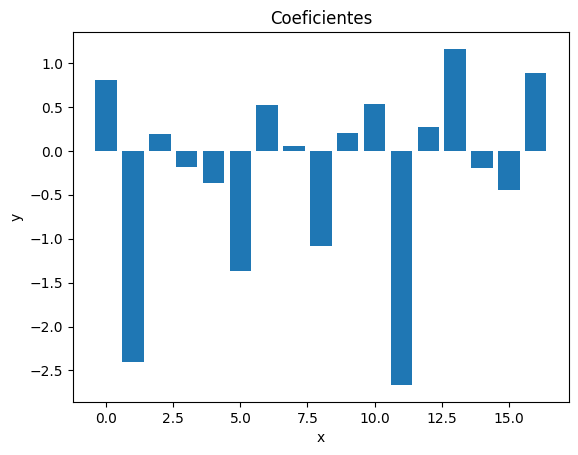

In [44]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [435]:
# X_test = np.where(np.isnan(X_test), 0, X_test)
# X_test

In [45]:
X_test.shape

(800, 17)

In [46]:
predictions = model.predict(X_test)

In [47]:
predictions

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,

In [48]:
test["predicciones"]=predictions
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases,predicciones
0,0.000000,0.000000,1.950,0.000,0.000000,0.000000,0.000000,2,0.000000,0,5,0,17,0.800000,0,0,0.666667,ENTAILMENT,1
1,0.438461,22.222702,1.648,1.702,3.408460,0.009896,0.180890,4,1.777778,0,21,16,9,0.047619,0,0,0.000000,NONENTAILMENT,0
2,0.842588,14.627888,1.719,1.767,3.968106,0.004401,0.313517,1,0.588235,0,13,10,17,0.307692,0,0,0.000000,NONENTAILMENT,0
3,0.000000,0.000000,1.995,0.000,0.000000,0.000000,0.000000,2,0.000000,0,6,0,12,0.833333,0,0,0.000000,ENTAILMENT,1
4,0.520280,24.582914,1.788,1.753,3.849227,0.004548,0.233145,5,1.700000,0,23,17,10,0.130435,0,0,0.000000,NONENTAILMENT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.561679,24.970238,1.569,1.456,3.314428,0.003592,0.155089,0,0.947368,0,21,18,19,0.142857,0,0,0.166667,NONENTAILMENT,0
796,0.686623,2.922877,1.808,1.565,3.935828,0.004631,0.204012,1,0.074074,0,7,2,27,0.571429,0,0,0.250000,ENTAILMENT,0
797,0.539739,20.957439,1.709,1.577,3.336211,0.009568,0.190885,2,0.937500,0,18,15,16,0.111111,0,0,0.000000,NONENTAILMENT,0
798,0.905576,21.693279,1.979,1.921,3.582727,0.006588,0.327758,3,0.833333,0,20,15,18,0.150000,0,1,0.090909,NONENTAILMENT,0


In [49]:
incorrectos = test[(test["clases"]=="ENTAILMENT") & (test["predicciones"]==0)]
incorrectos

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases,predicciones
10,1.745669,2.943090,1.831,2.004,3.870794,0.003870,0.457970,1,0.090909,0,6,2,22,0.500000,0,0,0.000000,ENTAILMENT,0
12,1.327224,1.460727,1.834,1.640,3.958804,0.004918,0.335447,1,0.066667,0,5,1,15,0.600000,0,0,0.000000,ENTAILMENT,0
15,0.843327,2.901448,2.010,1.723,3.869685,0.004083,0.373472,0,0.222222,0,4,2,9,0.750000,0,0,0.000000,ENTAILMENT,0
16,0.618067,5.864244,1.703,1.542,3.838268,0.003961,0.374353,2,0.190476,0,10,4,21,0.600000,0,0,0.400000,ENTAILMENT,0
23,0.645183,4.413850,1.890,1.552,3.860511,0.004020,0.202520,1,0.142857,0,8,3,21,0.375000,0,0,0.333333,ENTAILMENT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,0.721444,2.921776,2.073,1.793,3.957850,0.004884,0.369910,0,0.133333,0,3,2,15,0.333333,0,0,0.000000,ENTAILMENT,0
790,0.833846,4.327538,1.769,1.844,3.839726,0.004512,0.265665,0,0.200000,0,5,3,15,0.400000,0,0,0.250000,ENTAILMENT,0
793,0.910410,2.929108,1.416,1.507,3.906206,0.004008,0.166847,0,0.080000,0,4,2,25,0.750000,0,0,0.000000,ENTAILMENT,0
794,1.491931,2.909255,1.955,1.647,3.941051,0.004690,0.352543,1,0.090909,0,5,2,22,0.200000,0,0,0.000000,ENTAILMENT,0


In [50]:
print(confusion_matrix(y_test, predictions,labels=[1,0]))

[[234 165]
 [  4 397]]


In [51]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.79
precision:  0.98
recall 0.59
f1_score:  0.73
matthews_score:  0.63


In [52]:
X_train.shape

(800, 17)

In [53]:
X_test.shape

(800, 17)

In [54]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [55]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [56]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10,shuffle=True)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression Acurracy:: 0.840000 (0.021551)
Logistic Regression Precision:: 0.800000 (0.035721)
Logistic Regression Recall:: 0.910000 (0.038750)
Logistic Regression F1-score:: 0.850000 (0.020833)


In [57]:
kfold = model_selection.KFold(n_splits=10,shuffle=True)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')

In [58]:
print(cv_results)
print(round(cv_results.mean(),2))
print(round(cv_results.std(),2))

[0.7875  0.85    0.81875 0.8375  0.86875 0.85    0.88125 0.775   0.85
 0.85   ]
0.84
0.03


In [59]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.820000 (0.149169)
Logistic Regression Recall:: 0.910000 (0.100693)
Logistic Regression F1-score:: 0.860000 (0.120874)


In [60]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.660000 (0.321642)


In [61]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.840000 (0.138739)
Logistic Regression Recall:: 0.840000 (0.149682)
Logistic Regression F1-score:: 0.830000 (0.166663)


In [110]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_micro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_micro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_micro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.840000 (0.150021)
Logistic Regression Recall:: 0.840000 (0.150021)
Logistic Regression F1-score:: 0.840000 (0.150021)


In [111]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_macro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_macro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_macro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.840000 (0.141452)
Logistic Regression Recall:: 0.830000 (0.152177)
Logistic Regression F1-score:: 0.830000 (0.168243)


In [112]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [57]:
#linear_model

In [58]:
# model = LogisticRegression()
# model.fit(X_train,y_train)

In [269]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))
print(confusion_matrix( y_test,y_predict,labels=[1,0]))

              precision    recall  f1-score   support

           0       0.70      0.99      0.82       401
           1       0.98      0.57      0.72       399

    accuracy                           0.78       800
   macro avg       0.84      0.78      0.77       800
weighted avg       0.84      0.78      0.77       800

[[229 170]
 [  4 397]]


In [270]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-1])
shap_values = explainer(X_test)

In [271]:
test.columns[:-1]

Index(['sumas', 'distancias', 'mutinf', 'max_info', 'list_M',
       'Jaro-Winkler_rit', 'overlap_ent', 'clases'],
      dtype='object')

In [272]:
explainer.expected_value

-0.17935426760892378

In [273]:
X_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.8       ,
        0.66666667],
       [0.15762408, 0.50211939, 0.82896449, ..., 0.76190476, 0.04761905,
        0.        ],
       [0.30290529, 0.33051544, 0.96507483, ..., 0.76923077, 0.30769231,
        0.        ],
       ...,
       [0.19403266, 0.47353093, 0.81139307, ..., 0.83333333, 0.11111111,
        0.        ],
       [0.325549  , 0.49015714, 0.87134765, ..., 0.75      , 0.15      ,
        0.09090909],
       [0.2866686 , 0.26004892, 0.93563382, ..., 0.66666667, 0.33333333,
        0.16666667]])

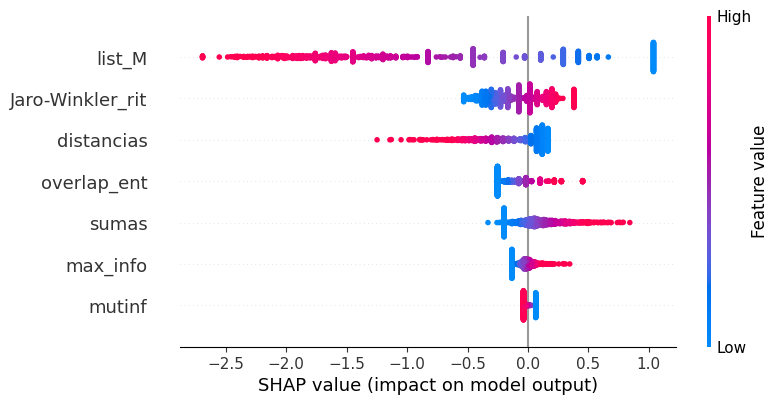

In [274]:
shap.plots.beeswarm(shap_values)

In [275]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

[0.35626913 0.39154871 0.93267485 0.30348551 0.75       0.375
 0.07692308] 0 0


IndexError: index 7 is out of bounds for axis 0 with size 7

In [66]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[0.19358178 0.04059002 0.61307902 0.44772546 0.9577156  0.1034393
 0.25356351 0.33333333 0.00986842 0.         0.17073171 0.04
 0.44444444 0.85714286 0.         1.         0.        ]


IndexError: index 1 is out of bounds for axis 2 with size 1

In [350]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [ ]:
['sumas', 'distancias', 'entropia_total', 'mutinf','mearts', 'max_info',  'diferencias', 'list_M', 'list_m', 'Jaro-Winkler_rit','overlap_ent']

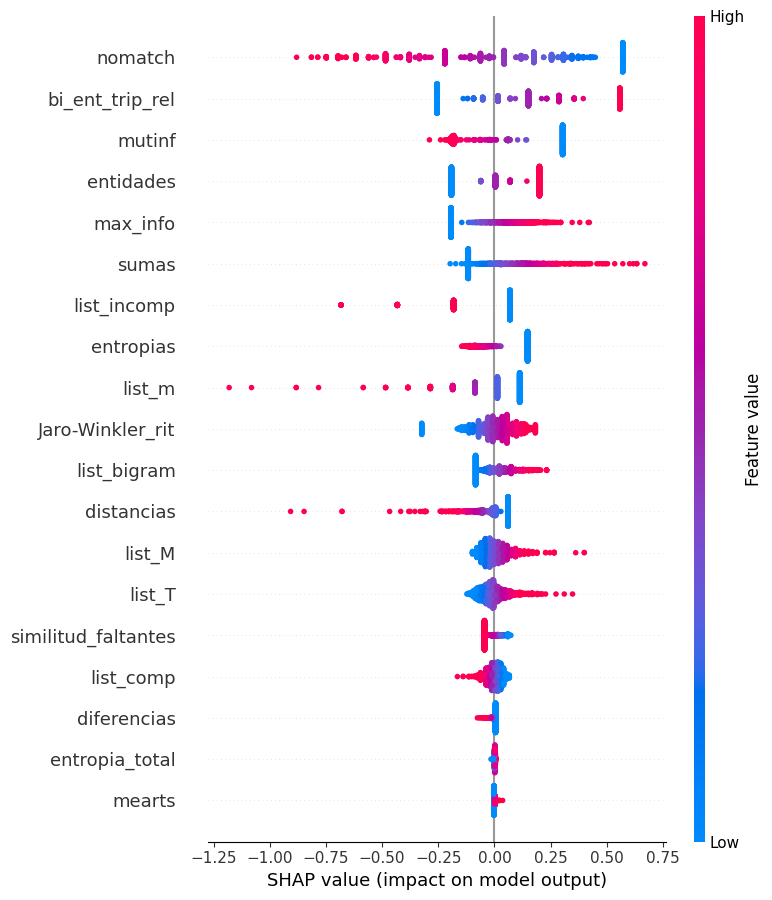

In [96]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

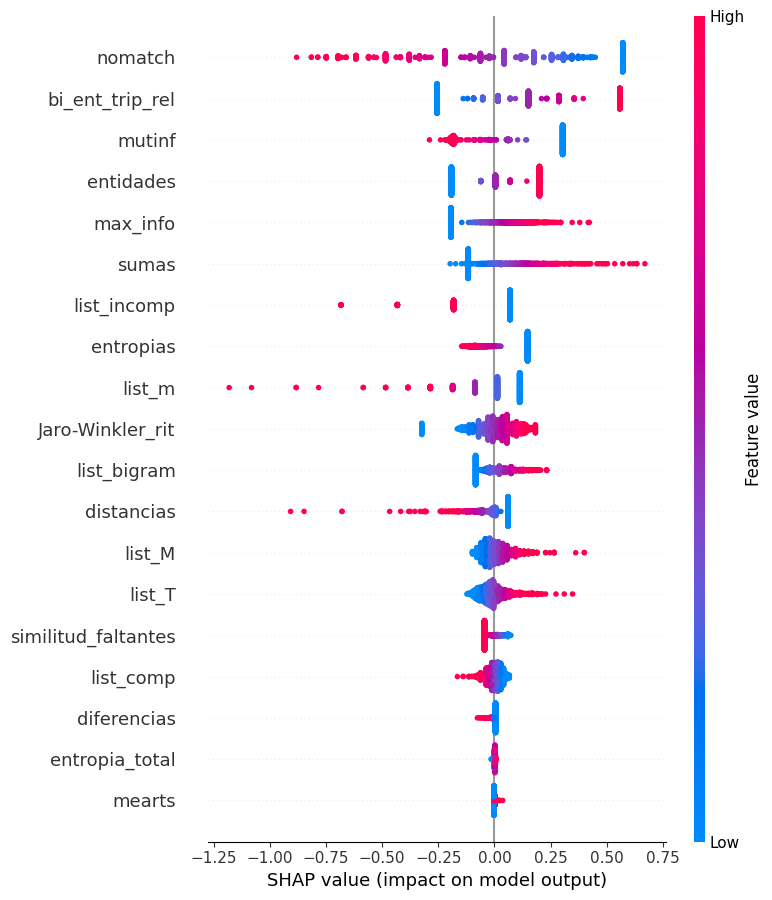

In [97]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

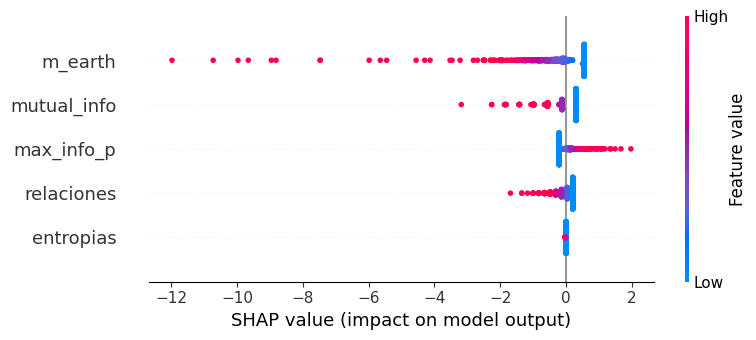

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [448]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [449]:
y_train.count(1)

412

In [450]:
y_train.count(0)

388

In [451]:
# y_trainC=[]
# for j in range(len(y_train)):
#     if y_train[j]==1:
#         y_trainC.append("entailment")
#     else:
#         y_trainC.append("not_entailment")

In [452]:
print(len(y_train))
print(len(y_trainC))

800
800


In [453]:
y_trainC.count("not_entailment")

388

In [454]:
y_train.count(0)

388

In [455]:
# y_testC=[]
# for j in range(len(y_test)):
#     if y_test[j]==1:
#         y_testC.append("entailment")
#     else:
#         y_testC.append("not_entailment")

In [456]:
print(len(y_test))
print(len(y_testC))

800
800


In [457]:
y_testC.count("not_entailment")

401

In [458]:
y_test.count(0)

401

In [459]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [460]:
y_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,

In [461]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))# 
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.72
precision:  0.79
recall 0.58
f1_score:  0.67
matthews_score:  0.45


In [462]:
validation_size = 0.10
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [463]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.790000 (0.039461)
DecisionTree: 0.790000 (0.061346)
DecisionTree: 0.820000 (0.053830)
DecisionTree: 0.810000 (0.036024)


In [464]:
print(cv_results)

[0.82926829 0.82352941 0.74647887 0.81818182 0.78911565 0.81889764
 0.76623377 0.81538462 0.85185185 0.875     ]


In [465]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[340,  61],
       [166, 233]])

In [466]:
c

Index(['distancias', 'mutinf', 'max_info', 'diferencias', 'Jaro-Winkler_rit',
       'overlap_ent'],
      dtype='object')

In [467]:
from sklearn import tree

In [468]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 0.26
|   |--- feature_0 <= 0.01
|   |   |--- feature_4 <= 0.30
|   |   |   |--- feature_4 <= 0.16
|   |   |   |   |--- feature_5 <= 0.98
|   |   |   |   |   |--- feature_5 <= 0.42
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_5 >  0.42
|   |   |   |   |   |   |--- feature_5 <= 0.57
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_5 >  0.57
|   |   |   |   |   |   |   |--- feature_5 <= 0.76
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_5 >  0.76
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_5 >  0.98
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  0.16
|   |   |   |   |--- feature_5 <= 0.46
|   |   |   |   |   |--- feature_4 <= 0.21
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_4 >  0.21
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  0.46
|   |   |   |   |   |--- feature_4 <= 0.24


Profundidad del árbol: 17
Número de nodos terminales: 267


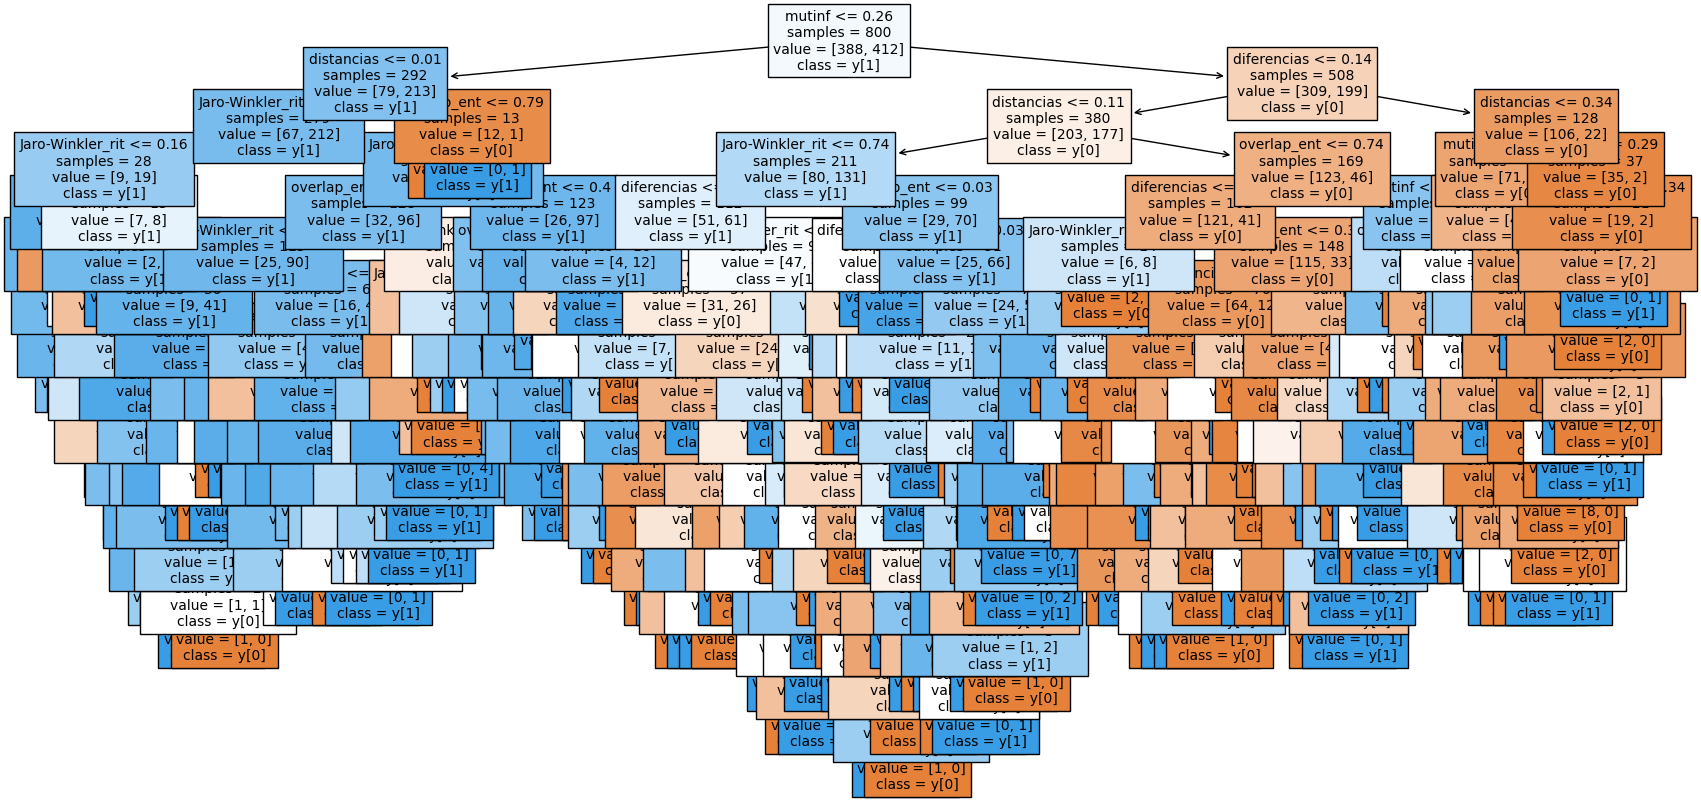

In [469]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )